In [1]:

import numpy as np
import networkx as nx

In [2]:
G = nx.DiGraph()

In [4]:
G.add_node(1,name="slack",smax=50,d=80)
G.add_node(2,name="2",smax=0,d=240)
G.add_node(3,name="3",smax=165,d=40)
G.add_node(4,name="4",smax=0,d=160)
G.add_node(5,name="5",smax=0,d=240)


In [5]:
G.add_edge(1,2,y=1/(0.1+0.40j),dist=40, cap=100)
G.add_edge(1,4,y=1/(0.15+0.60j),dist=60, cap=80)
G.add_edge(1,5,y=1/(0.05+0.20j),dist=20, cap=100)
G.add_edge(2,3,y=1/(0.05+0.20j),dist=20, cap=100)
G.add_edge(2,4,y=1/(0.1+0.40j),dist=40, cap=100)
G.add_edge(3,5,y=1/(0.05+0.20j),dist=20, cap=100)

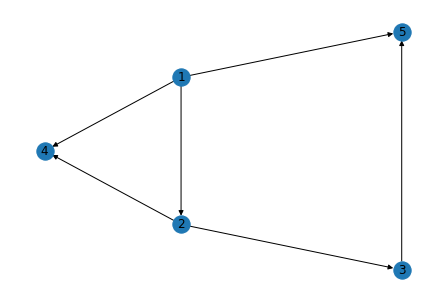

In [6]:
nx.draw(G,with_labels=True,pos=nx.spectral_layout(G))

In [14]:
list(G.nodes)
list(G.edges)

[(1, 2), (1, 4), (1, 5), (2, 3), (2, 4), (3, 5)]

In [9]:
A = nx.incidence_matrix(G,oriented=True)
Yp = np.diag([G.edges[k]["y"] for k in G.edges])
Ybus = A@Yp@A.T
print(Ybus)
print(np.linalg.eigvals(Ybus.real))

AttributeError: module 'scipy.sparse' has no attribute 'lil_array'

In [10]:
n = G.number_of_nodes()
YN0 = Ybus[1:n,0]
YNN = Ybus[1:n,1:n]
ZNN = np.linalg.inv(YNN)
d = np.array([G.nodes[k]["d"] for k in G.nodes])
print(YN0)
print(YNN)

NameError: name 'Ybus' is not defined

In [11]:
def LoadFlow(sN,dN):
    v0 = 1+0j
    vN = np.ones(n-1)*v0
    for t in range(10):
        vN = ZNN@(np.conj((sN-dN)/vN)-v0*YN0)
        vT = np.hstack([v0,vN]);
        sT = vT*np.conj(Ybus@vT)
        err = np.linalg.norm(sT[1:n]-(sN-dN))
    print("Load Flow, after 10 iterations the error is",err)
    return vT

In [12]:
VT = LoadFlow(np.zeros(n-1),d[1:n])
ST = VT*np.conj(Ybus@VT)
pL = sum(ST)
print("Loss",pL)
for (k,m) in G.edges:
    Sf = Ybus[k,m]*(VT[k]-VT[m])
    print("flow",(k,m),np.abs(Sf))

NameError: name 'd' is not defined